In [173]:
#Dependencies
import requests
import json
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.ticker as ticker
from pprint import pprint
from datetime import datetime
from matplotlib import pyplot as plt
from scipy import stats
from matplotlib.ticker import FuncFormatter

# Bank Asset Data/Graph

In [174]:
five_bank_asset_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A%20628%20OR%20CERT%3A%203510%20OR%20CERT%3A%203511%20OR%20CERT%3A%2033124%20OR%20CERT%3A%207213%20OR%20CERT%3A%2059017&fields=CERT%2CREPDTE%2CASSET%2CCHBAL%2CSC%2CFREPO%2CLNLSNET%2CLNRE%2CTRADE%2CBKPREM%2CORE%2CINTAN%2CAOA%2CNAME%2C%20TRADE&sort_by=REPDTE&sort_order=DESC&limit=264&format=json&download=false&filename=data_file"

In [175]:
bank_asset= requests.get(five_bank_asset_url).json()
pprint(bank_asset)

{'data': [{'data': {'AOA': 49332000,
                    'ASSET': 490799000,
                    'BKPREM': 602000,
                    'CERT': 33124,
                    'CHBAL': 122935000,
                    'FREPO': 68655000,
                    'ID': '33124_20230331',
                    'INTAN': 1890000,
                    'LNLSNET': 157130000,
                    'LNRE': 26899000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'ORE': 0,
                    'REPDTE': '20230331',
                    'SC': 32751000,
                    'TRADE': 57504000},
           'score': 0},
          {'data': {'AOA': 112474000,
                    'ASSET': 2518290000,
                    'BKPREM': 19403000,
                    'CERT': 3510,
                    'CHBAL': 365662000,
                    'FREPO': 40359000,
                    'ID': '3510_20230331',
                    'INTAN': 58620000,
                    'LNLSNET': 1030410000,
                    'LNRE'

In [176]:
#Create a list to hold the data of each financial asset
Combined_assetdata=[]

#loop through the data details of the dictionary 
for asset in bank_asset['data']:
        Date = asset['data']["REPDTE"]
        Total_asset=asset['data']["ASSET"]
        Bank_Certificate=asset['data']["CERT"]
        Bank_Name=asset['data']["NAME"]
        Cash_Balances_due_Depo_In=asset['data']["CHBAL"]
        Securities=asset['data']["SC"]
        Federal_Funds_Sold_Reverse_repurchase=asset['data']["FREPO"]
        Net_Loans_Leases=asset['data']["LNLSNET"]
        Real_Estate_loan=asset['data']["LNRE"]
        Bankpremises_fixedasset=asset['data']["BKPREM"]
        Other_real_estate_owned=asset['data']["ORE"]
        Goodwill_otherIntangibles=asset['data']["INTAN"]
        All_Other_Assets=asset['data']["AOA"]
        Trading_Account_Assets=asset["data"]["TRADE"]
        
        
        Combined_assetdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Asset": Total_asset,
                                  "Cash and Balances due from Depository Institutions": Cash_Balances_due_Depo_In,
                                  "Securities": Securities,
                                   "Federal Funds Sold & Reverse Repurchase Agreements":Federal_Funds_Sold_Reverse_repurchase,
                                  "Net Loans Lease":Net_Loans_Leases,
                                   "Trading Account Assets":Trading_Account_Assets,
                                  "All Real Estate Loans":Real_Estate_loan,
                                   "Bank Premises and Fixed Assets":Bankpremises_fixedasset,
                                  "Other Real Estate Owned":Other_real_estate_owned,
                                   "Goodwill and Other Intangibles":Goodwill_otherIntangibles,
                                  "All Other Asset":All_Other_Assets
                                  })
     

In [177]:
new_data = pd.DataFrame(Combined_assetdata)

new_bank_asset= new_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_asset.head()

,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,Trading Account Assets,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset
0,20120630,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,170927000,195686000,4553000,348000,18532000,81484000
1,20120630,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,38177000,2586000,0,0,4000,7488000
2,20120630,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,77954029,412263790,10253110,2501993,63950326,105268172
3,20120630,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,287301000,275976000,10424000,2050000,35762000,116341000
4,20120630,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,17434,22526845,126297,3490,168475,1710899


##Part 1: a) Create stack stacked bar chart, b) liquidity ration, 3)Pie chart analysis of current asset vs. non-current
 

In [178]:
#Total assets=  Cash and balances due from depository institutions + securities+ Net Loans and leases + Other Real Estates Owned+ Goodwill and other Intangibles
#Current asset = Cash and balances due from depository institutions + securities
#create dataframe of each bank of the current asset vs. total asset
new_bank_asset["Current Asset"]=new_bank_asset["Cash and Balances due from Depository Institutions"]+new_bank_asset["Securities"]+new_bank_asset["Federal Funds Sold & Reverse Repurchase Agreements"]
new_bank_asset["Curret Asset Ratio"]=new_bank_asset["Current Asset"]/new_bank_asset["Total Asset"]
new_bank_asset.head()


,Reporting Date,Bank Name,Bank Certificate #,Total Asset,Cash and Balances due from Depository Institutions,Securities,Federal Funds Sold & Reverse Repurchase Agreements,Net Loans Lease,Trading Account Assets,All Real Estate Loans,Bank Premises and Fixed Assets,Other Real Estate Owned,Goodwill and Other Intangibles,All Other Asset,Current Asset,Curret Asset Ratio
0,20120630,CITIBANK NATIONAL ASSN,7213,1347841000,172522000,254308000,71198000,573969000,170927000,195686000,4553000,348000,18532000,81484000,498028000,0.369501
1,20120630,GOLDMAN SACHS BANK USA,33124,114693000,44086000,0,11128000,13810000,38177000,2586000,0,0,4000,7488000,55214000,0.481407
2,20120630,BANK OF AMERICA NA,3510,1445093157,136863710,328771279,16586665,702943873,77954029,412263790,10253110,2501993,63950326,105268172,482221654,0.333696
3,20120630,JPMORGAN CHASE BANK NA,628,1812825000,176095000,342767000,247782000,594303000,287301000,275976000,10424000,2050000,35762000,116341000,766644000,0.422900
4,20120630,FIRST REPUBLIC BANK,59017,30987001,800818,3105339,19330,25034919,17434,22526845,126297,3490,168475,1710899,3925487,0.126682


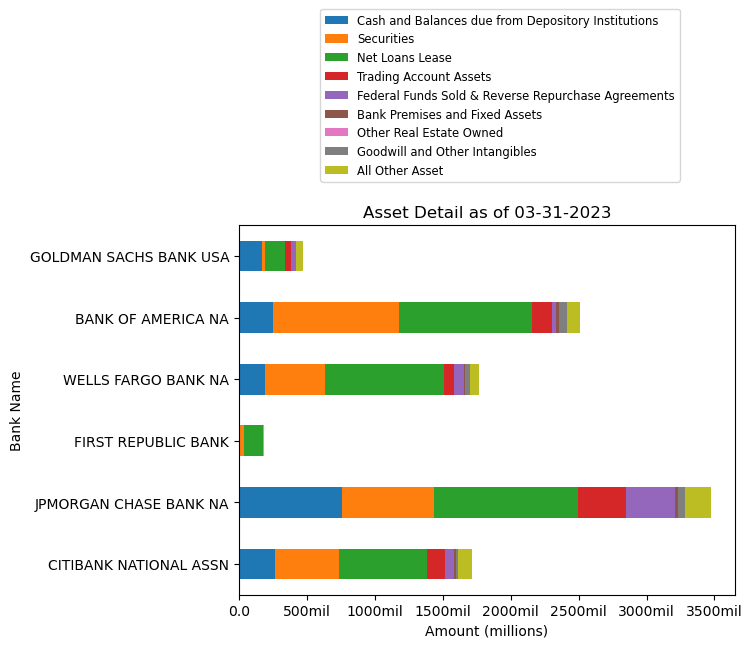

In [179]:
#Create a stack bar chart with the compositon of the asset.
#Total Asset= Cash and Balances due from Depository Institutions+Securities+Net Loans Lease+Federal funds sold & revenue repurchase agreements +Trading account assets + Banking premises and fixed assets+ Other real estate owned+ Goodwill and other intangibles+All other assets
March312023_bank_asset=new_bank_asset.loc[(new_bank_asset["Reporting Date"]=="20220331")]
Asset_df=March312023_bank_asset.set_index("Bank Name")[["Cash and Balances due from Depository Institutions","Securities","Net Loans Lease","Trading Account Assets","Federal Funds Sold & Reverse Repurchase Agreements","Bank Premises and Fixed Assets","Other Real Estate Owned","Goodwill and Other Intangibles","All Other Asset"]]
ax = Asset_df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor= (0.9, 1.6),fontsize='small')
plt.title("Asset Detail as of 03-31-2023")
plt.xlabel("Amount (millions)")
plt.ylabel("Bank Name")

def format_x_axis_labels(value, _):
    if value >= 1000000:
        value = f"{int(value/1000000)}mil"
    return value

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_axis_labels))

#Save the image into output folder
plt.savefig("Outputs/Asset_Details_03312023.png")

### Bank Asset Bar Chart Findings/Conclusions:
1) The stacked asset bar chart show, JP Morgan has over 3.2 billion in asset and is the largest bank in the US in size and operations compared to the other 4 largest banks: BOA - 2.5 billion,Citi -1.7 billion, Wells Fargo- 1.68 billion, Goldman - 500 million. First Replblic Bank is the smallest with about 230 million in assets.

2) The assets of the banks consists of cash and deposit loaned out to other banks, securities that banks invested in, loans and leases to individuals and business to earn interest - which is the main operation of the bank, Federal funds sold are excess of bank reserves lent in the federal funds market, Reverse Repurchase Agreements is the sale of securities with the agreement to repurchase them at a higher price at a specific future date. Based on the bar chart, JP Morgan has more additional excess funds/capital reserve avaliable compared to the other banks and has a greater amount of excess funds lent out to  other banks and to the federal funds market. Additionally JPMC aslo lent to other banks via reverse repurchase agreement (where jpmc buys the securities from another bank and agrees to sell them back at a premium the next day as the other banks are short in cash reserve). Based on our research, JPMC is more liquid and has the ability to convert assets into cash quickly to cover unexpected cash outflows. This could be one of the reason that FDIC chair called the CEO of JP Morgan to bail out First Republic Bank when it failed in May 2023.

3) The above bar chart for First Republic Banks show it only had the 3 following assets: 1)Cash and Balances due from Depository Institutions, Securities, loan and leases to to individuals and business and other assets. However, cash loaned to other banks is only $1 million, it did not have excess reserves or fund. 

# Bank Liabilities & Equities

In [180]:
bank_liabilites_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A%20628%20OR%20CERT%3A%203510%20OR%20CERT%3A%203511%20OR%20CERT%3A%2033124%20OR%20CERT%3A%207213%20OR%20CERT%3A%2059017&fields=CERT%2CREPDTE%2CDEP%2CDEPDOM%2CDEPFOR%2CFREPP%2CTRADEL%2COTHBRF%2CALLOTHL%2CEQTOT%2CNAME%2CSUBND%2CLIABEQ%2CLIAB&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [181]:
Bank_liabilites= requests.get(bank_liabilites_url).json()
pprint(Bank_liabilites)

{'data': [{'data': {'ALLOTHL': 35566000,
                    'CERT': 33124,
                    'DEP': 337173000,
                    'DEPDOM': 324813000,
                    'DEPFOR': 12360000,
                    'EQTOT': 50422000,
                    'FREPP': 24000000,
                    'ID': '33124_20230331',
                    'LIAB': 440377000,
                    'LIABEQ': 490799000,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'OTHBRF': 9660000,
                    'REPDTE': '20230331',
                    'SUBND': 2272000,
                    'TRADEL': 31706000},
           'score': 0},
          {'data': {'ALLOTHL': 41508000,
                    'CERT': 3510,
                    'DEP': 2015381000,
                    'DEPDOM': 1903082000,
                    'DEPFOR': 112299000,
                    'EQTOT': 232471000,
                    'FREPP': 141110000,
                    'ID': '3510_20230331',
                    'LIAB': 2285819000,
     

In [182]:
#Create a list to hold the data of each financial asset
Combined_liabilitesdata=[]

for liab in Bank_liabilites['data']:
        Date = liab['data']["REPDTE"]
        Bank_Certificate=liab['data']["CERT"]
        Bank_Name=liab['data']["NAME"]
        Total_liabilites_and_capitals=liab['data']["LIABEQ"]
        Total_liabilities=liab['data']["LIAB"]
        Total_Deposit=liab['data']["DEP"]
        Deposits_in_Domestic_Offices=liab['data']["DEPDOM"]
        Deposits_in_Foreign_Offices=liab['data']["DEPFOR"]
        All_other_liabilities=liab['data']["ALLOTHL"]
        Total_Equity_Capital=liab['data']["EQTOT"]
        Federal_funds_purchased_repurchase=liab['data']["FREPP"]
        Trading_Liabilities=liab['data']["TRADEL"]
        Other_borrowed_funds=liab['data']["OTHBRF"]
        Subordinated_debt=liab['data']["SUBND"]
        
        
        
        
        
        Combined_liabilitesdata.append({"Reporting Date": Date,
                                   "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                   "Total Liabilites and capitals": Total_liabilites_and_capitals,
                                   "Total Liabilites":Total_liabilities,
                                   "Total Deposit": Total_Deposit,
                                   "Total Domestic Deposit":Deposits_in_Domestic_Offices,
                                   "Total Foreign Deposit":Deposits_in_Foreign_Offices,
                                   "All other Liabilities":All_other_liabilities,
                                   "Total Equity Capital":Total_Equity_Capital,
                                   "Federal funds purchased and repurchase agreements":Federal_funds_purchased_repurchase,
                                   "Trading Liabilites": Trading_Liabilities,
                                   "Other borrowed funds": Other_borrowed_funds,
                                    "Subordinated debt":Subordinated_debt
                                  })
     

In [183]:
new_liabilites_data= pd.DataFrame(Combined_liabilitesdata)

new_bank_liabilites= new_liabilites_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_liabilites.tail()

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total Equity Capital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds,Subordinated debt
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,2958911000,2472913000,2043646000,429267000.0,147462000,309052000,110991000,126220000,101065000,260000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,214954325,104473959,104473959,0.0,3760542,17989836,445753,50578,105444141,779352
261,20230331,WELLS FARGO BANK NA,3511,1687507000,1524982000,1406796000,1387849000,18947000.0,28607000,162525000,8289000,20579000,49675000,11036000
262,20230331,BANK OF AMERICA NA,3510,2518290000,2285819000,2015381000,1903082000,112299000.0,41508000,232471000,141110000,29893000,56413000,1514000
263,20230331,GOLDMAN SACHS BANK USA,33124,490799000,440377000,337173000,324813000,12360000.0,35566000,50422000,24000000,31706000,9660000,2272000


In [184]:
#calculate current liability of the bank - will use to determine the current ratio
new_bank_liabilites["Current Liability"]=new_bank_liabilites["Total Deposit"]+new_bank_liabilites["Federal funds purchased and repurchase agreements"]
new_bank_liabilites.tail()

,Reporting Date,Bank Name,Bank Certificate #,Total Liabilites and capitals,Total Liabilites,Total Deposit,Total Domestic Deposit,Total Foreign Deposit,All other Liabilities,Total Equity Capital,Federal funds purchased and repurchase agreements,Trading Liabilites,Other borrowed funds,Subordinated debt,Current Liability
259,20230331,JPMORGAN CHASE BANK NA,628,3267963000,2958911000,2472913000,2043646000,429267000.0,147462000,309052000,110991000,126220000,101065000,260000,2583904000
260,20230331,FIRST REPUBLIC BANK,59017,232944161,214954325,104473959,104473959,0.0,3760542,17989836,445753,50578,105444141,779352,104919712
261,20230331,WELLS FARGO BANK NA,3511,1687507000,1524982000,1406796000,1387849000,18947000.0,28607000,162525000,8289000,20579000,49675000,11036000,1415085000
262,20230331,BANK OF AMERICA NA,3510,2518290000,2285819000,2015381000,1903082000,112299000.0,41508000,232471000,141110000,29893000,56413000,1514000,2156491000
263,20230331,GOLDMAN SACHS BANK USA,33124,490799000,440377000,337173000,324813000,12360000.0,35566000,50422000,24000000,31706000,9660000,2272000,361173000


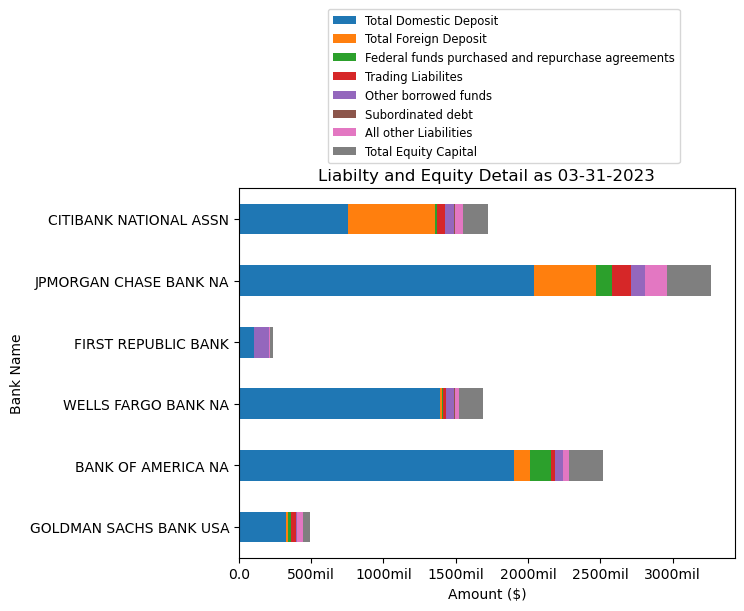

In [185]:
#Create a stack bar chart with the compositon of the liability and equity.
#Total Liabilites and capitals=Total Domestic Deposit+Total Foreign Deposit+Federal funds purchased and repurchase agreements+Trading Liabilities+Other borrowed funds+Subordinated debt+All other liabilities+Total Equity Capital
March312023_bank_liability=new_liabilites_data.loc[(new_liabilites_data["Reporting Date"]=="20230331")]
liability_df=March312023_bank_liability.set_index("Bank Name")[["Reporting Date","Total Domestic Deposit","Total Foreign Deposit","Federal funds purchased and repurchase agreements","Trading Liabilites","Other borrowed funds","Subordinated debt","All other Liabilities","Total Equity Capital"]]
ax = liability_df.plot.barh(stacked=True)
ax.legend(bbox_to_anchor= (0.9, 1.5),fontsize='small')
plt.title("Liabilty and Equity Detail as 03-31-2023")
plt.xlabel("Amount ($)")
plt.ylabel("Bank Name")

def format_x_axis_labels(value, _):
    if value >= 1000000:
        value = f"{int(value/1000000)}mil"
    return value

plt.gca().xaxis.set_major_formatter(FuncFormatter(format_x_axis_labels))

#Save the image into output folder
plt.savefig("Outputs/Liability_Equity_03312023.png")

### Bank Liabilities and Equities Bar Chart Findings/Conclusions:
#### Liability + Equity = Asset
1) Bank liability is what the bank owes to others - the deposit from customers are liability as the bank will need to return to customer.
Equity= total asset- total liabilities. Net worth/capital of the bank or its equity value to investors.

2) Based on the bar chart, all bank's largest liability is deposit received from customers - which is the main source of their funds. In addition, the main depoists are from the US. JPMC also has the largest equity/capital - which means greater valuation by investors.

3) In addition, for the quarter ending March 31, 2023 (bank failed on May 1, 2023), first repubic has borrowed funds representing 50% of its liability to support its business operations. The banks has very small capital as shown Total Equity/Capital - which mean investors were already weary of the outlook of the bank and confidence in the bank is low. 



In [186]:
#Current Ratio = Current Asset/Current Liability -used to short term solvency of the banks
current_ratio_df=new_bank_liabilites[["Reporting Date","Bank Name"]]
current_ratio_df["Current Ratio"]=new_bank_asset["Current Asset"]/new_bank_liabilites["Current Liability"]
current_ratio_df


/var/folders/sj/x89h_gtx1xz5z_2wkfs8fww80000gn/T/ipykernel_64873/207294053.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  current_ratio_df["Current Ratio"]=new_bank_asset["Current Asset"]/new_bank_liabilites["Current Liability"]


,Reporting Date,Bank Name,Current Ratio
0,20120630,CITIBANK NATIONAL ASSN,0.512250
1,20120630,GOLDMAN SACHS BANK USA,0.782966
2,20120630,BANK OF AMERICA NA,0.422077
3,20120630,JPMORGAN CHASE BANK NA,0.567264
4,20120630,FIRST REPUBLIC BANK,0.162108
...,...,...,...
259,20230331,JPMORGAN CHASE BANK NA,0.590268
260,20230331,FIRST REPUBLIC BANK,0.452463
261,20230331,WELLS FARGO BANK NA,0.434688
262,20230331,BANK OF AMERICA NA,0.542453


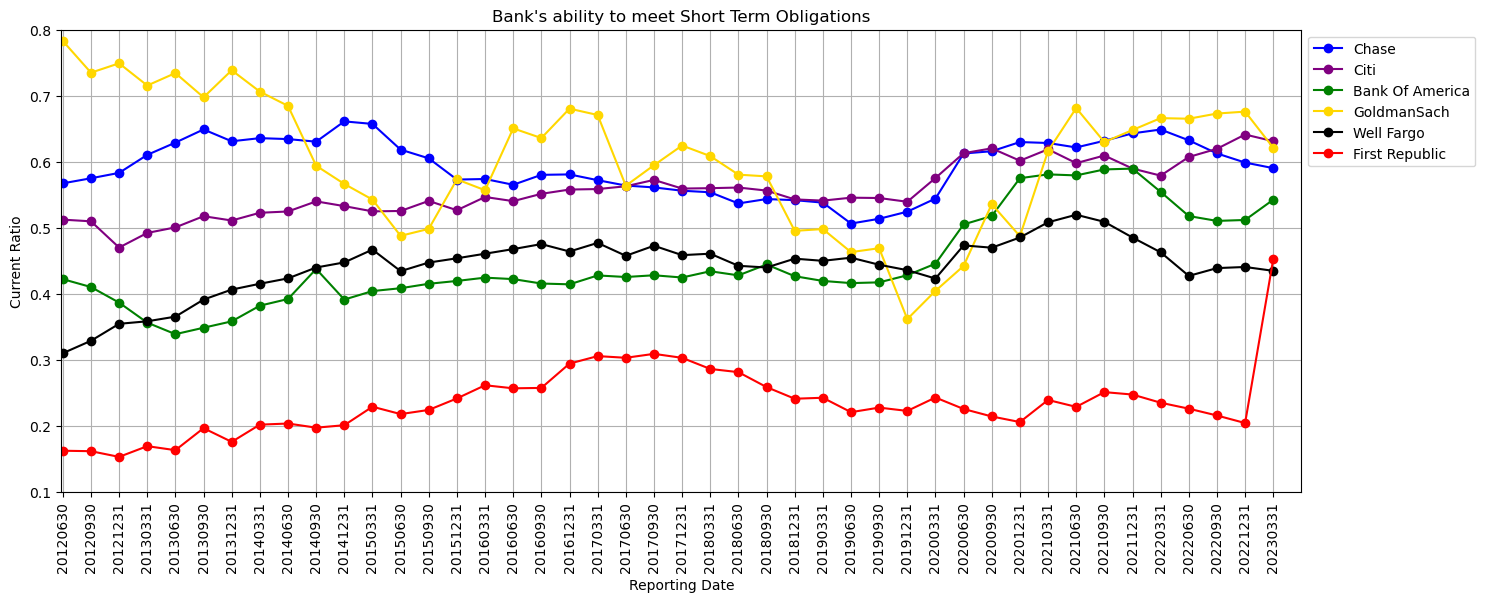

In [187]:
#Plot current ratio over time for the six banks

#Set figure size
plt.figure(figsize=(16,6))

#Prepare x-axis
x_axis = np.arange(len(current_ratio_df["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

#plot each bank's data
Chase,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Current Ratio"], color="blue", label="Chase",marker='o')
Citi,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Current Ratio"], color="purple", label="Citi",marker='o')
BOA, = plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="BANK OF AMERICA NA"),"Current Ratio"], color="green", label="Bank Of America",marker='o')
GoldmanSachs,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Current Ratio"], color="gold", label="GoldmanSach",marker='o')
Wells_Fargo,=plt.plot(x_axis, current_ratio_df.loc[(current_ratio_df["Bank Name"]=="WELLS FARGO BANK NA"),"Current Ratio"], color="black", label="Well Fargo",marker='o')
First_republic,=plt.plot(x_axis,current_ratio_df.loc[(current_ratio_df["Bank Name"]=="FIRST REPUBLIC BANK"),"Current Ratio"], color="red", label="First Republic",marker='o')

plt.xticks(tick_locations, current_ratio_df["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Bank's ability to meet Short Term Obligations")
plt.xlabel("Reporting Date")
plt.ylabel("Current Ratio")

# Add limits to x axis and y-axis
plt.xlim(-0.05,len(current_ratio_df["Reporting Date"].unique()))
plt.ylim(0.1,0.8)

# Create a legend for the chart
plt.legend(bbox_to_anchor= (1, 1))

#Add grid
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Bank_ability_to_meet_short_term_obligations.png",bbox_inches = "tight")

### Current Ratio Analysis:
#### Current Ratio=Current Asset/Current Liability 
- Current Ratio can be defined as a liquidity ratio that measures a company's ability to pay short-term obligations or those due within one year.
- "Current Asset" are the most liquid forms of assets that can be turned to cash(Current asset = Cash and balances due from depository institutions + securities+Federal Funds Sold & Reverse Repurchase Agreement). We want to analyze the bank's ability to cover short term liabilities with its assets.
- "Current Liability" are the short term obligations that the bank must pay back on demand such as depoist froms customers(Current liability= Total Deposit + Federal funds purchased and repurchase agreements)

1) Based on line graph comparison, first republic bank's current ratio was always lower than other 5 banks. The current ratio for JPMC is the similar compared to citibank and higher than BOA and Wells Fargo.
2) First republic's current asset ratio has been declining since 2017 and have not been more than 2.5 while the other 5 banks which have been at least 0.4 (with the exception of Goldman Sach for 12/31/2019). The ratio could also explain majority of First Republic's asset is invested in long term vehicles and will not be able to handle the unexpected cash outflows or market fluctions such as conistent increase in interest rate on the liabilities the bank owes. There was a sharp increase in the ratio from 0.2 to 0.45 from the quarter ending 12/31/2023 to 03/31/2023, the reason is due to 70 mil decrease in deposit - due to the signficant decrease in liability due from deposit.  



# Bank Performace Ratios

In [188]:
bank_performance_url="https://banks.data.fdic.gov/api/financials?filters=CERT%3A628%20OR%20CERT%3A3510%20OR%20CERT%3A3511%20OR%20CERT%3A33124%20OR%20CERT%3A7213%20OR%20CERT%3A59017&fields=CERT%2CREPDTE%2CROE%2CROA%2CNIMY%2CEEFFR%2CLNLSNTV%2CLNLSDEPR%2CIDLNCORR%2CDEPDASTR%2CIDT1RWAJR%2CRBC1AAJ%2CNAME&sort_by=REPDTE&sort_order=DESC&limit=264&offset=0&agg_limit=1&format=json&download=false&filename=data_file"

In [189]:
bank_performace=requests.get(bank_performance_url).json()
pprint(bank_performace)

{'data': [{'data': {'CERT': 33124,
                    'DEPDASTR': 66.18,
                    'EEFFR': 42.61487964989059,
                    'ID': '33124_20230331',
                    'IDLNCORR': 64.20702505679868,
                    'IDT1RWAJR': 13.598852660054359,
                    'LNLSDEPR': 46.60218938052572,
                    'LNLSNTV': 32.02,
                    'NAME': 'GOLDMAN SACHS BANK USA',
                    'NIMY': 2.1266688279154753,
                    'RBC1AAJ': 9.776439756905367,
                    'REPDTE': '20230331',
                    'ROA': 1.3532890282542038,
                    'ROE': 13.41},
           'score': 0},
          {'data': {'CERT': 3510,
                    'DEPDASTR': 75.57,
                    'EEFFR': 52.53852097631926,
                    'ID': '3510_20230331',
                    'IDLNCORR': 55.169138563463974,
                    'IDT1RWAJR': 13.347971635290307,
                    'LNLSDEPR': 51.127305457380025,
                    

In [190]:
combined_performance=[]

for perf in bank_performace['data']:
        Date = perf['data']["REPDTE"]
        Bank_Certificate=perf['data']["CERT"]
        Bank_Name=perf['data']["NAME"]
        Net_Interest_Margin=perf['data']["NIMY"]
        Return_on_Assets=perf['data']["ROA"]
        Return_on_Equity=perf['data']["ROE"]
        Efficiency_Ratio=perf['data']["EEFFR"]
        Net_Loans_Leases_to_Assets=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_Deposits=perf['data']["LNLSNTV"]
        Net_Loans_Leases_to_CoreDeposit=perf['data']["IDLNCORR"]
        Domestic_Deposits_to_Total_Assets=perf['data']["DEPDASTR"]
        Tier_1_Risk_Based_Capital_Ratio=perf['data']["IDT1RWAJR"]
        
        
        combined_performance.append({"Reporting Date": Date,
                                     "Bank Name":Bank_Name,
                                   "Bank Certificate #": Bank_Certificate,
                                    "Net Interest Margin": Net_Interest_Margin,
                                    "Return on Assets": Return_on_Assets,
                                    "Return on Equity": Return_on_Assets,
                                    "Efficiency Ratio": Efficiency_Ratio,
                                    "Net Loans Leases to Assets": Net_Loans_Leases_to_Assets,
                                    "Net Loans Leases to Deposits": Net_Loans_Leases_to_Deposits,
                                    "Net Loans Leases to Core Deposit": Net_Loans_Leases_to_CoreDeposit,
                                    "Domestic Deposits to Total Assets":Domestic_Deposits_to_Total_Assets,
                                    "Tier 1 Risk Based Capital Ratio": Tier_1_Risk_Based_Capital_Ratio
                                       })
     

In [191]:
new_perf_data= pd.DataFrame(combined_performance)

new_bank_perfor= new_perf_data.sort_values(by="Reporting Date",ascending=True).reset_index(drop=True)
new_bank_perfor.tail()

,Reporting Date,Bank Name,Bank Certificate #,Net Interest Margin,Return on Assets,Return on Equity,Efficiency Ratio,Net Loans Leases to Assets,Net Loans Leases to Deposits,Net Loans Leases to Core Deposit,Domestic Deposits to Total Assets,Tier 1 Risk Based Capital Ratio
259,20230331,JPMORGAN CHASE BANK NA,628,3.037683,1.448429,1.448429,49.889716,34.23,34.23,59.124465,62.54,17.263379
260,20230331,FIRST REPUBLIC BANK,59017,1.697503,0.483146,0.483146,68.120847,74.06,74.06,294.056164,44.85,11.673376
261,20230331,WELLS FARGO BANK NA,3511,3.596714,1.413670,1.413670,56.405511,53.27,53.27,68.612129,82.24,12.240646
262,20230331,BANK OF AMERICA NA,3510,2.806533,1.343057,1.343057,52.538521,40.92,40.92,55.169139,75.57,13.347972
263,20230331,GOLDMAN SACHS BANK USA,33124,2.126669,1.353289,1.353289,42.614880,32.02,32.02,64.207025,66.18,13.598853


# Profitability - Net Interest Margin Ratio

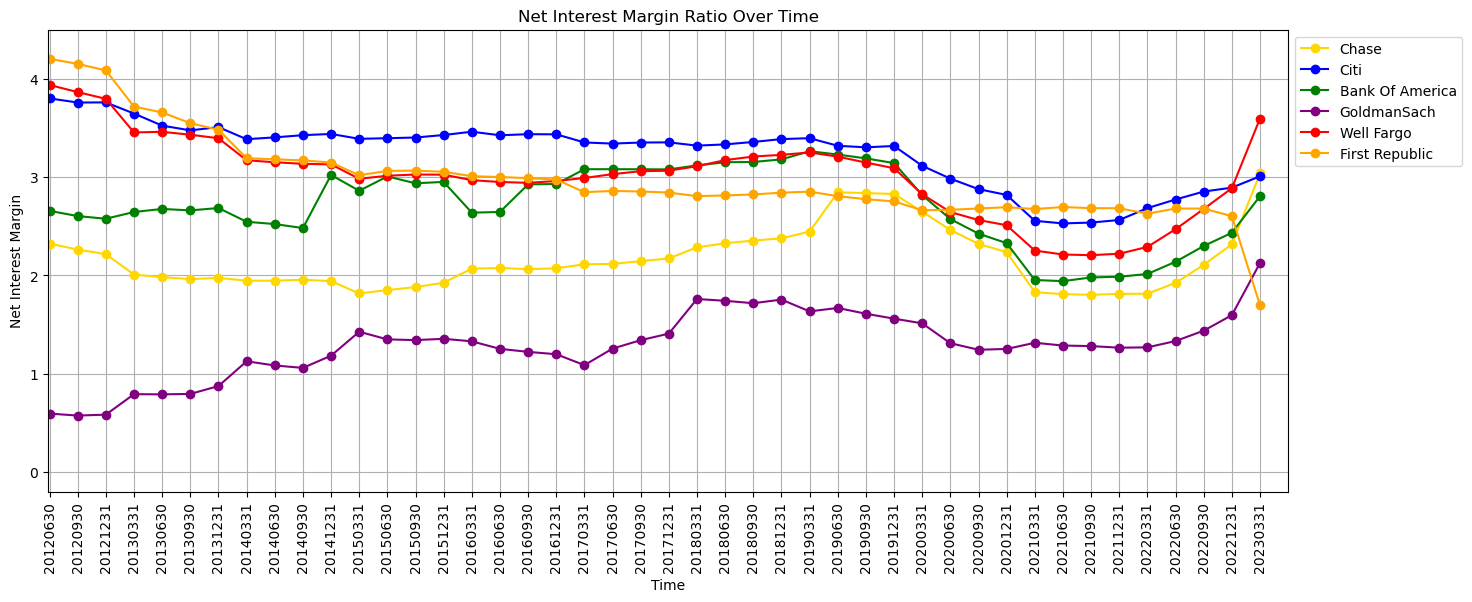

In [192]:
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Data for each bank
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Net Interest Margin"], marker ='o' ,color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Net Interest Margin"], marker ='o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Net Interest Margin"], marker = 'o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Net Interest Margin"], marker = 'o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Net Interest Margin"], marker = 'o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Net Interest Margin"], marker ='o', color="orange", label="First Republic")

plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes and title
plt.title("Net Interest Margin Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Net Interest Margin")

# Add limits to x axis and y-axis
plt.xlim(-0.05,44)
plt.ylim(-0.2,4.5)

# Create a legend for the chart and grid
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Net_Interest_Margin.png",bbox_inches = "tight")

### Net Interest Margin Ratio Analysis:
- The  net interest margin measures the net return on the banks earning assets. Each bank displays major change in their net interest margin over time during 2019-2021. Clearly due to the climate of 2020, banks didn't receive much return. Which could seem like a negative impact but Chase demonstrates that it only changed with about a 1% difference. Then returned back to its original margin of 2%. Chase has consistently kept their net interest close to the same margin even when their was the disturbance in 2020. Which could be extremely reassuring to Chases consumers due to low fluctuation in interest-earnings compared to other banks.

# Profitability - Return on Assets

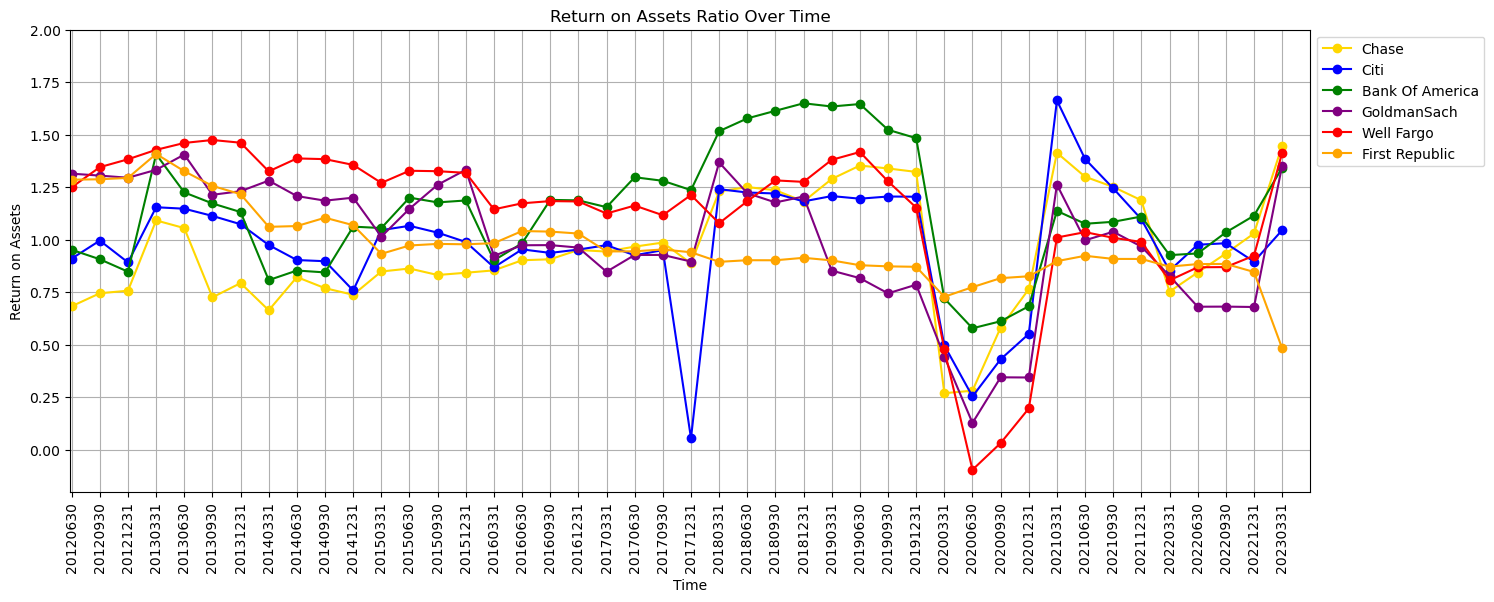

In [193]:
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Data for each bank
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Return on Assets"], marker ='o', color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Return on Assets"], marker ='o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Return on Assets"], marker ='o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Return on Assets"], marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Return on Assets"], marker='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Return on Assets"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes and title
plt.title("Return on Assets Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Return on Assets")

# Add limits to x axis and y-axis
plt.xlim(-0.05,44)
plt.ylim(-0.2,2)

# Create a legend for the chart and grid
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Return_on_Asset.png",bbox_inches = "tight")

### Return on Assets Analysis:
- Chase is a growing bank with smart leadership because Chase learned what’s valuable  in 2013. Which  may have helped them bounce back through 2020 and 2022 due to its steady increase from 2014 - 2017. The assets provided leverage and Consumers can see that the bank demonstrates well management with assets due to these findings.

# Profitability - Return on Equity

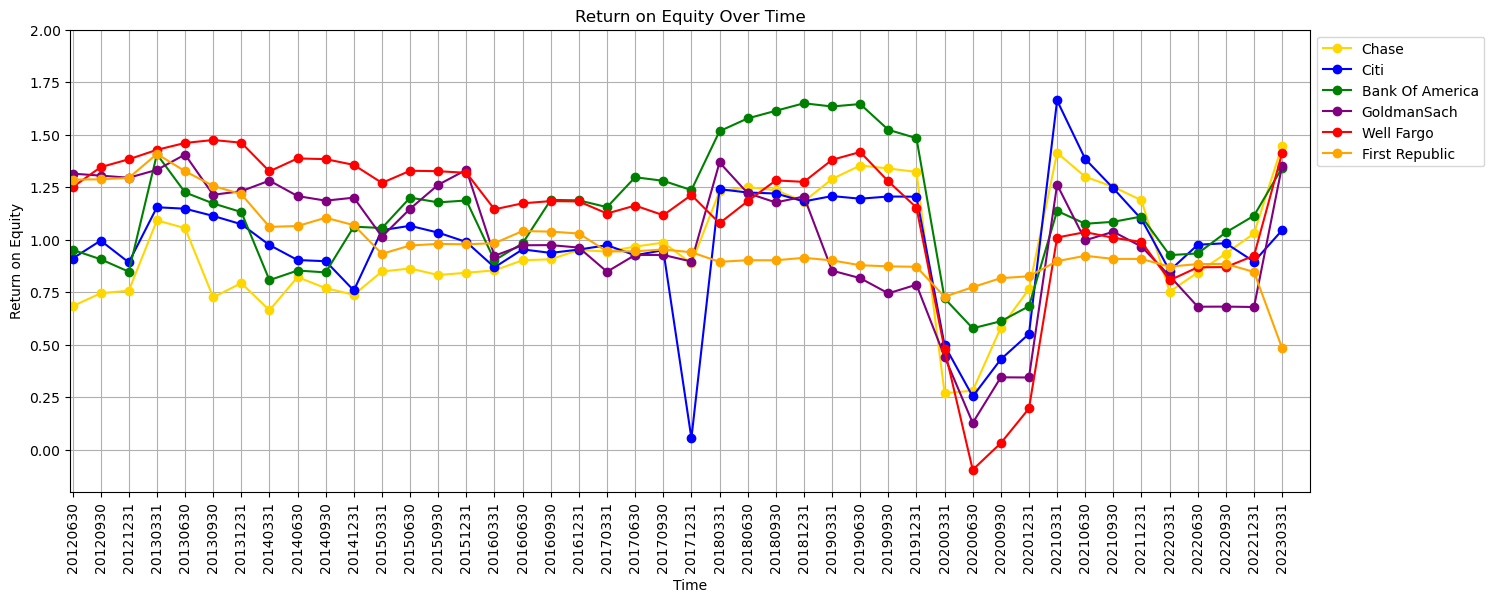

In [194]:
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Data for each bank
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Return on Equity"], marker ='o', color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Return on Equity"], marker = 'o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Return on Equity"], marker ='o',color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Return on Equity"], marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Return on Equity"], marker ='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Return on Equity"], marker ='o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes and title
plt.title("Return on Equity Over Time")
plt.xlabel("Time")
plt.ylabel("Return on Equity")

# Add limits to x axis and y-axis
plt.xlim(-0.08,44)
plt.ylim(-0.2,2)

# Create a legend for the chart and grid
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Return_on_Equity.png",bbox_inches = "tight")

### Return on Equity Analysis:
- JP Morgan chase made a pivotable move that improved their return on equity roughly by 1% in 2013 then again by 1.2% in 2021. Which is way more reliable than having the same increase and decrease within the same year like Citi bank. So consumers can depend on Chase a little better than most because over time they can tell Chase will do what's best to bring back a return on equity regardless of what disrupts it.

# Efficiency Ratio

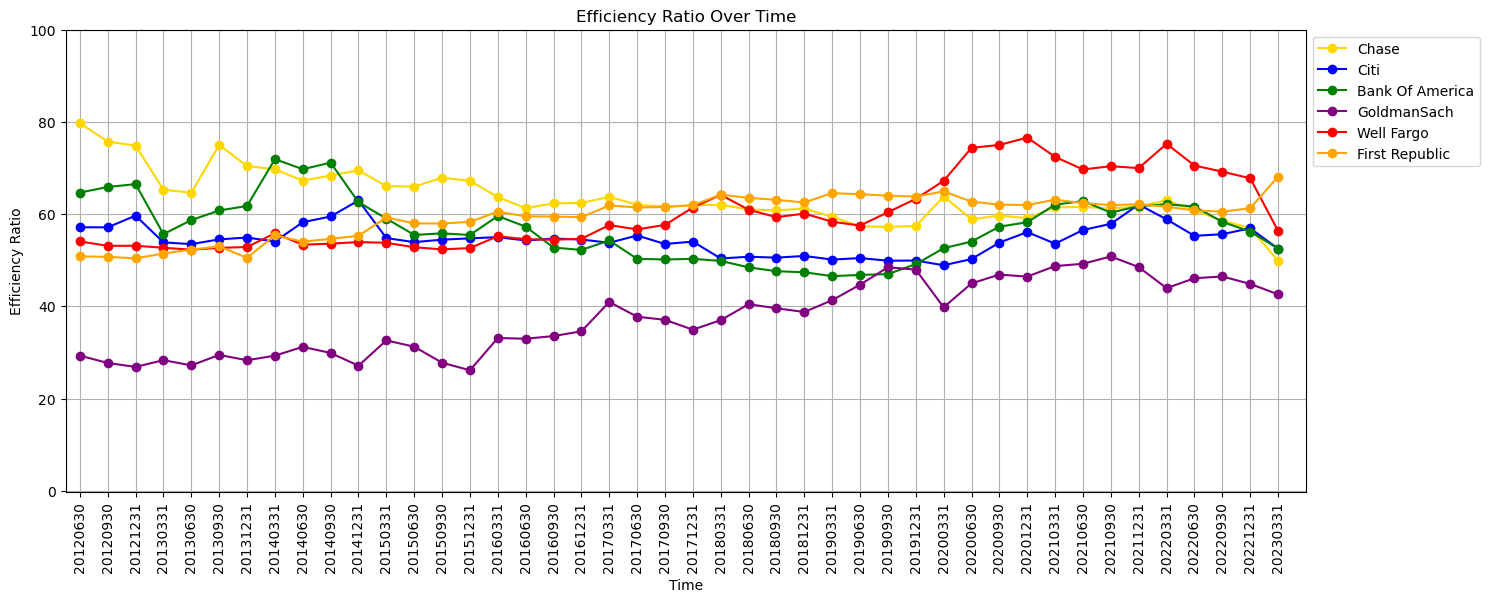

In [195]:
plt.figure(figsize=(16,6))
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Data for each bank
Chase,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="JPMORGAN CHASE BANK NA"),"Efficiency Ratio"], marker ='o', color="gold", label="Chase")
Citi,=plt.plot(x_axis,new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="CITIBANK NATIONAL ASSN"),"Efficiency Ratio"], marker = 'o', color="blue", label="Citi")
BOA, = plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="BANK OF AMERICA NA"),"Efficiency Ratio"], marker ='o', color="green", label="Bank Of America")
GoldmanSachs,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="GOLDMAN SACHS BANK USA"),"Efficiency Ratio"],marker ='o', color="purple", label="GoldmanSach")
Wells_Fargo,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="WELLS FARGO BANK NA"),"Efficiency Ratio"], marker ='o', color="red", label="Well Fargo")
First_republic,=plt.plot(x_axis, new_bank_perfor.loc[(new_bank_perfor["Bank Name"]=="FIRST REPUBLIC BANK"),"Efficiency Ratio"], marker = 'o', color="orange", label="First Republic")
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")
 
# Add labels to X and Y axes and title
plt.title("Efficiency Ratio Over Time")
plt.xlabel("Time")
plt.ylabel("Efficiency Ratio")

# Add limits to x axis and y-axis
plt.xlim(-0.5,44)
plt.ylim(-0.2,100)

# Create a legend for the chart and grid
plt.legend(bbox_to_anchor= (1, 1))
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Efficiency_Ratio.png",bbox_inches = "tight")

### Efficiency Ratio Analysis:
- The first quarter of 2023 Chases efficiency ratio improved by dropping down 10% whereas first republic increased almost 10%. The goal is to have a lower efficiency ratio because it lets consumers know that they are spending less of its revenue. Meaning consumers will know that banks are spending less of their invested money.

# Liquidity - Net Loans Leases to Assets Ratio

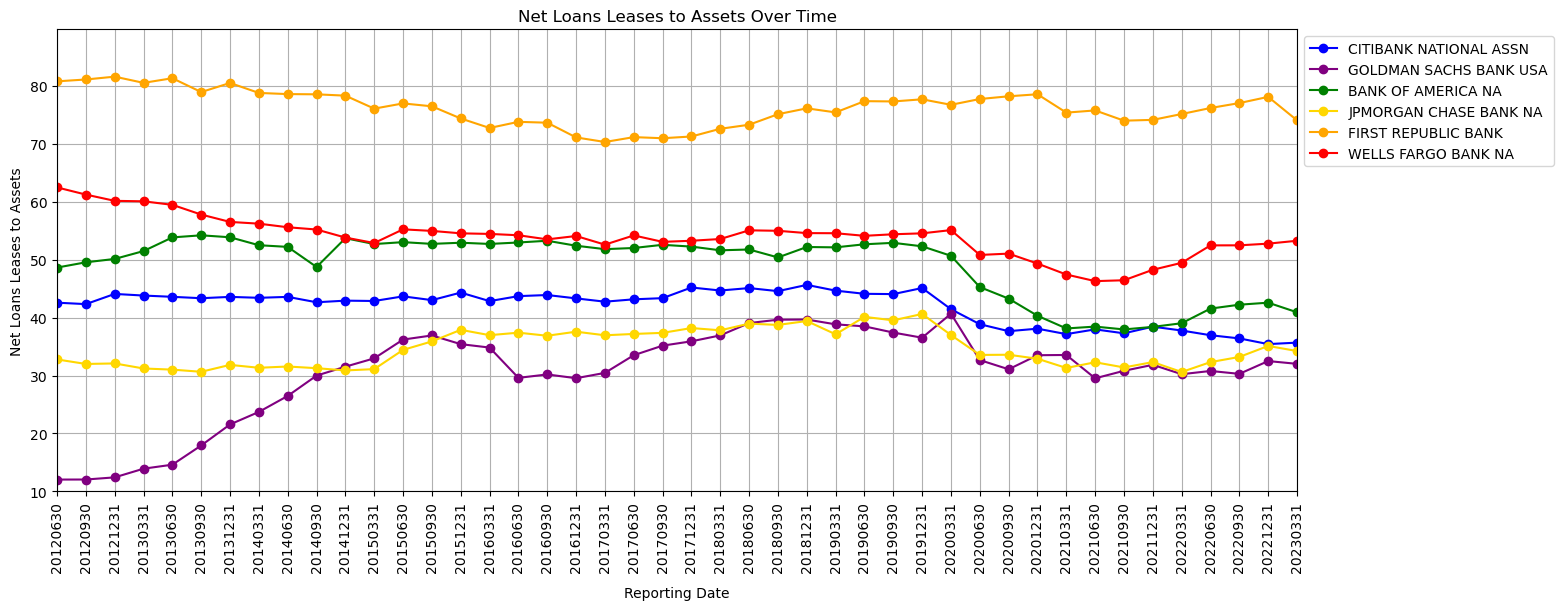

In [196]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Net Loans Leases to Assets"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Assets")

# Set y-axis limits
max_value = new_bank_perfor["Net Loans Leases to Assets"].max()
plt.ylim(10, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Net_Loans_Leases_to_Assets.png",bbox_inches = "tight")

# Show the plot
plt.show()

### Net Loans Leases to Assets Analysis:

1. Net loans and leases to assests indicates the extent to which a bank's assets are tied up in lending activities relative to its total assets.Over the period from 2012 to 2023, an analysis of the Net Loans Leases to Assets ratio reveals notable variations in performance among different banks. First Republic Bank exhibited comparatively weaker performance, with a higher level of risk associated with its loan portfolio. This indicates potential challenges in managing and maintaining a balanced asset-to-loan ratio.

2. First Republic Bank's net loans and leases ratio consistently falls within the range of 70% to 80%, indicating a significantly weaker performance compared to the steady and stable range of 30% to 40% observed in Chase Bank. This substantial difference of 133% is alarming when considering Ye's analysis, which suggests that First Republic Bank may lack the capability to manage unforeseen cash outflows or navigate market fluctuations effectively.

3. Conversely, Goldman Sachs demonstrated a relatively lower level of risk in terms of its Net Loans Leases to Assets ratio. Although minor fluctuations were observed over the years, the bank showcased a consistent and prudent approach to managing its loan portfolio, emphasizing risk mitigation strategies.

4. JP Morgan Chase, positioned as the second-best performer in terms of Net Loans Leases to Assets ratio, showcased a higher level of stability and consistency compared to other banks. While not as low-risk as Goldman Sachs, JP Morgan Chase's performance indicates effective loan portfolio management and a balanced approach to asset allocation.

- These observations highlight the varying levels of risk and performance among banks, with First Republic Bank exhibiting higher risk, Goldman Sachs demonstrating lower risk, and JP Morgan Chase showing a stable and consistent performance. These insights can inform assessments of each bank's loan portfolio management and risk management strategies.

# Liquidity - Net Loans Leases to Deposits Ratio

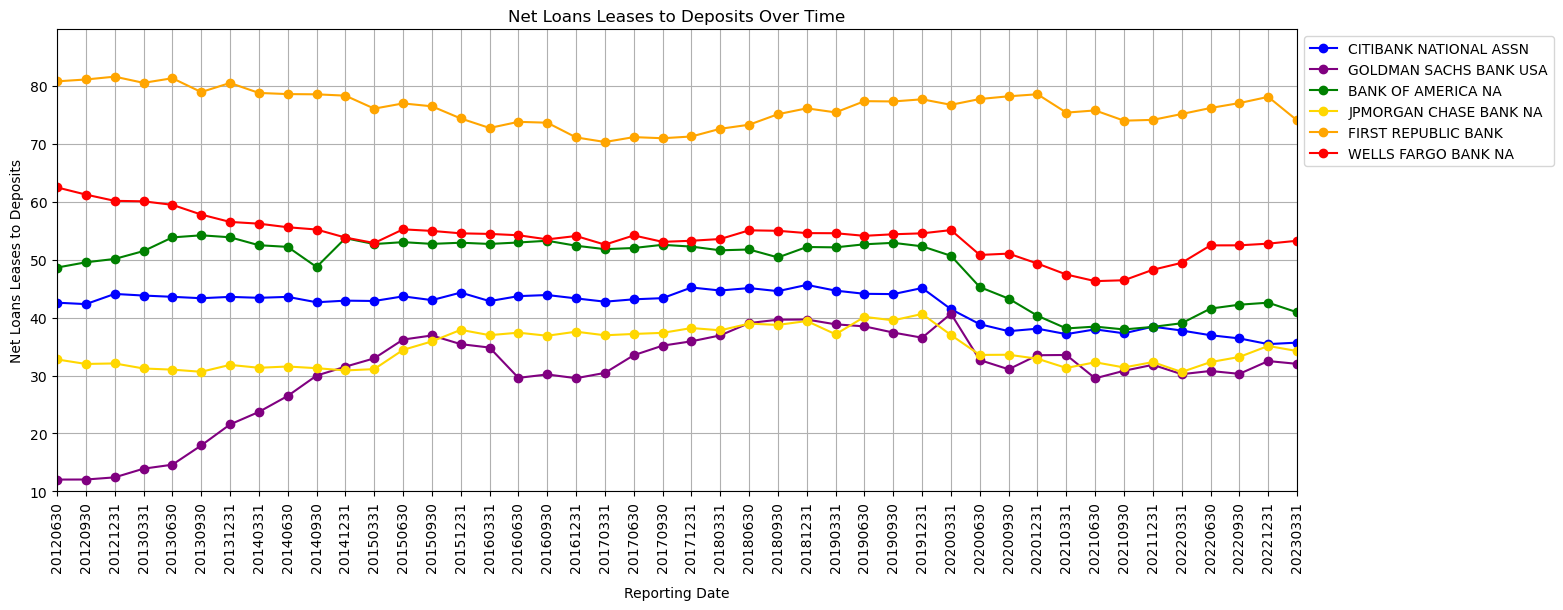

In [197]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Net Loans Leases to Deposits"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Net Loans Leases to Deposits Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Net Loans Leases to Deposits")

# Set y-axis limits
max_value = new_bank_perfor["Net Loans Leases to Deposits"].max()
plt.ylim(10, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Net_Loans_Leases_to_Deposit.png",bbox_inches = "tight")

# Show the plot
plt.show()

### Net Loans Leases to Deposits Analysis:

1. For the period from 2012 to 2023 reveals significant variations in risk levels among different banks. First Republic Bank emerges as the bank with the highest risk, with the risk reaching its peak in the last quarter of the 2022-2023 financial year. This indicates potential challenges in maintaining a balanced ratio between loans and deposits.

2. In contrast, JP Morgan Chase demonstrates the second-lowest level of risk among the banks analyzed, positioned just below Goldman Sachs. This suggests that JP Morgan Chase has effectively managed its loan portfolio in relation to its deposit base, mitigating potential risks associated with lending activities.

3. Goldman Sachs exhibits several fluctuations in risk levels over the years, but overall maintains a relatively low-risk profile in terms of the Net Loans Leases to Deposits ratio. Chase, on the other hand, demonstrates a higher level of stability and consistency with a low-risk profile. This indicates effective risk management practices and a balanced approach to lending and deposit activities.

These observations provide insights into the varying risk levels and risk management strategies employed by different banks. First Republic Bank emerges as a bank with higher risk, while JP Morgan Chase and Goldman Sachs showcase relatively lower risk profiles. Chase's consistency and stability further reinforce its prudent approach to managing the ratio between loans and deposits. These findings can assist in evaluating the risk exposure and loan portfolio management strategies of each bank


# Liquidity - Domestic Deposits to Total Assets Ratio

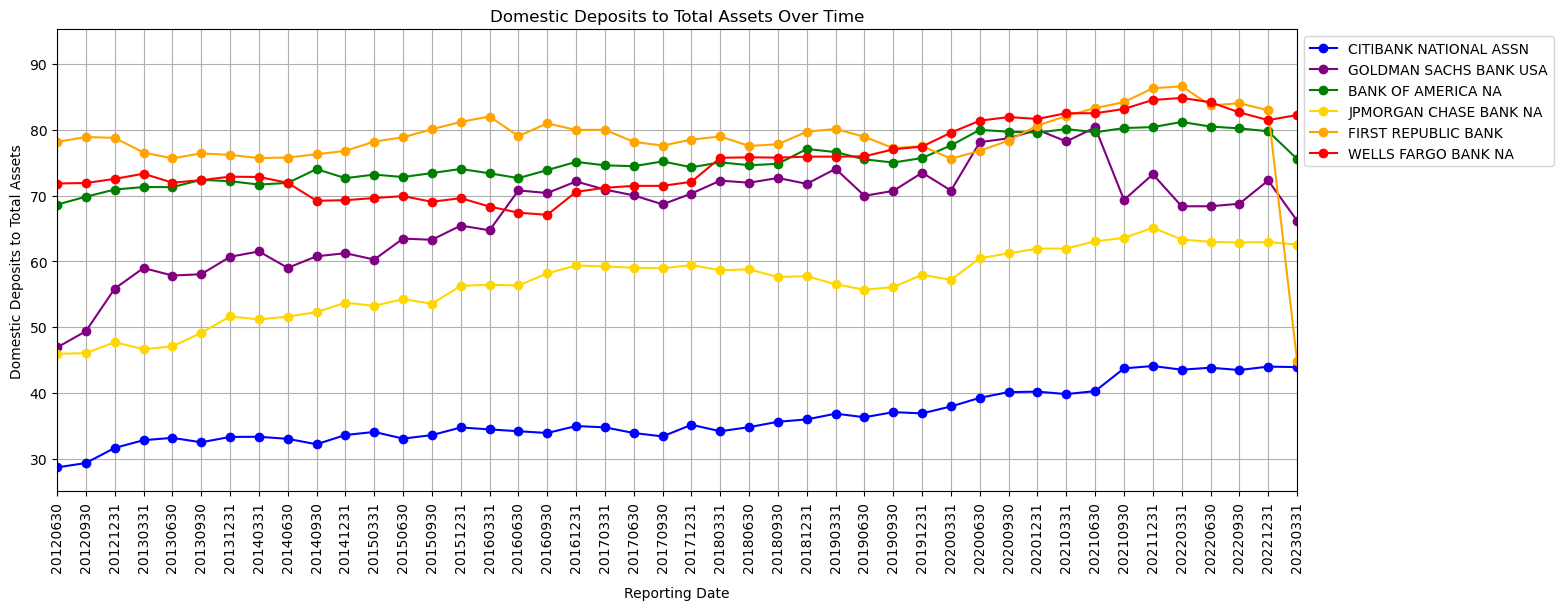

In [198]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Domestic Deposits to Total Assets"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Domestic Deposits to Total Assets Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Domestic Deposits to Total Assets")

# Set y-axis limits
max_value = new_bank_perfor["Domestic Deposits to Total Assets"].max()
plt.ylim(25, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Domestic_Deposits_to_total_asset.png",bbox_inches = "tight")

# Show the plot
plt.show()


### Domestic Deposits to Total Assets Analysis

1. It reveals that Citibank consistently maintained the lowest ratio compared to other banks during the period from 2012 to 2023. This suggests that Citibank had a relatively lower proportion of domestic deposits in relation to their total assets.

2. First Republic Bank, compared to other banks, demonstrates the most elevated ratio of domestic deposits. This imprudent decision exposes the bank to liquidity risk and a lack of diversification, which ultimately led to their failure by the conclusion of 2022. The graph illustrates a significant decline in the ratio from 83% to 45% during the last quarter, specifically from December 31, 2022, to March 31, 2023, amounting to a remarkable difference of 45.78%.

3. JP Morgan Chase, on the other hand, displayed a relatively stable and consistent range of values for Domestic Deposits to Total Assets, primarily fluctuating between 45% to 65%. This suggests that JP Morgan Chase maintained a moderate level of domestic deposits in relation to their total assets, with a relatively steady pattern over time. A stable domestic asset ratio indicates that the bank has gained the trust and confidence of its domestic depositors. It also suggests that the bank can rely on a consistent pool of funds to support its lending and other banking operations.

These observations provide insights into the composition of domestic deposits in relation to the total assets of different banks. Citibank consistently had the lowest ratio, while First Republic Bank and Bank of America showcased higher levels. JP Morgan Chase demonstrated a relatively stable and consistent pattern. These findings can aid in understanding the funding structure and deposit composition of each bank and may have implications for their overall financial stability and risk management.

# Tier 1 Risk Based Capital Ratio Over Reporting Date

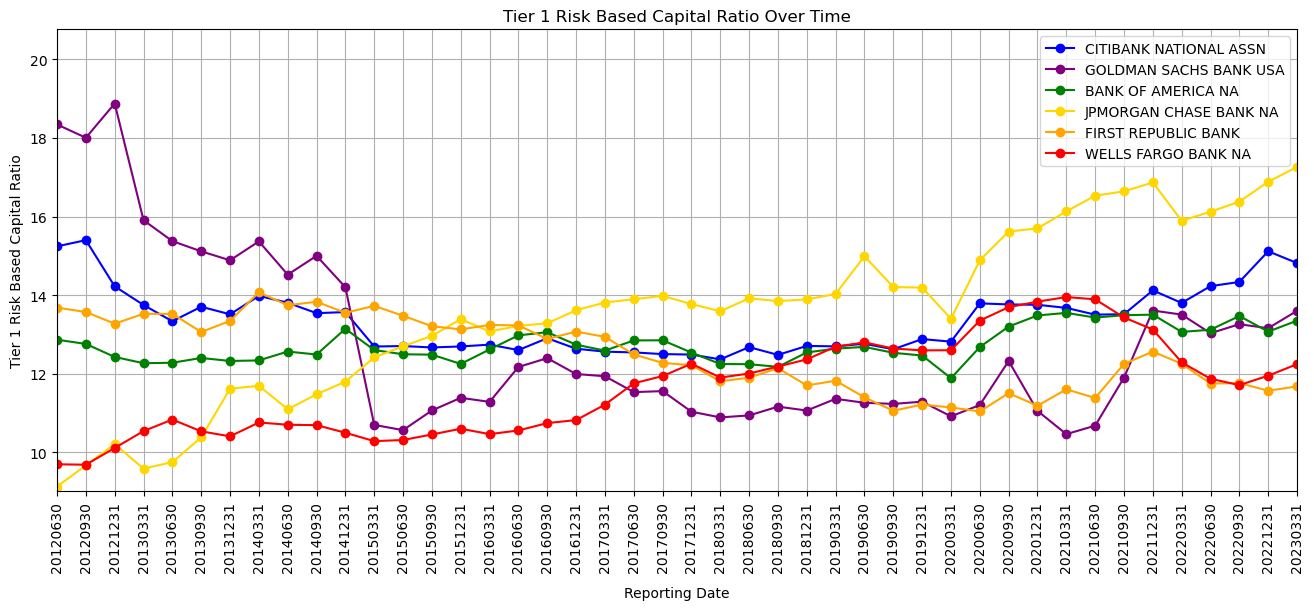

In [199]:
# Get the list of unique banks
bank_names = new_bank_perfor["Bank Name"].unique().tolist()

# Define a color palette
colors = ["blue", "purple", "green", "gold", "orange", "red"]

# Set figure size
plt.figure(figsize=(16, 6))

# Prepare x-axis
x_axis = np.arange(len(new_bank_perfor["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Plot each bank's data with markers and smoothed lines
for i, bank in enumerate(bank_names):
    data = new_bank_perfor.loc[new_bank_perfor["Bank Name"] == bank, "Tier 1 Risk Based Capital Ratio"]
    plt.plot(x_axis, data, marker='o', linestyle='-', color=colors[i], label=bank)

# Customize x-axis ticks and labels
plt.xticks(tick_locations, new_bank_perfor["Reporting Date"].unique(), rotation="vertical")

# Add labels to X and Y axes :: Add title
plt.title("Tier 1 Risk Based Capital Ratio Over Time")
plt.xlabel("Reporting Date", labelpad=10)
plt.ylabel("Tier 1 Risk Based Capital Ratio")

# Set y-axis limits
max_value = new_bank_perfor["Tier 1 Risk Based Capital Ratio"].max()
plt.ylim(9, max_value * 1.1)

# Set x-axis limits
plt.xlim(x_axis[0], x_axis[-1])

# Create a legend for the chart
plt.legend(bbox_to_anchor=(1, 1))

# Add gridlines
plt.grid()

#Save the image into output folder
plt.savefig("Outputs/Tier_1_Risk_Based_Capital.png",bbox_inches = "tight")

# Show the plot
plt.show()

### Tier 1 Risk Based Capital Ratio Analysis:

1. The Tier 1 Risk Based Capital Ratio analysis reveals an interesting trend for JP Morgan Chase. At the beginning of the decade in 2012, JP Morgan Chase had the lowest ratio, almost reaching zero.However In 2020 all banks had taken a plunge due to COVID19, even with this plunge Chase  made significant progress and emerged as the frontrunner among the competitor banks, achieving a remarkable Tier 1 Risk Based Capital Ratio of 17.0. Through proper risk management practices chase shows a 25.9259% increase while others such as first republic bank shows 8.18182% increase. This signifies a strong capital position and suggests that JP Morgan Chase has effectively managed its risk and maintained a solid capital buffer.

2. Goldman Sachs exhibited the highest level of fluctuation in the Tier 1 Risk Based Capital Ratio over the time period. The ratio varied considerably, indicating a higher degree of volatility and potentially reflecting the bank's exposure to various risk factors.

- These findings highlight the varying performances of banks in terms of their Tier 1 Risk Based Capital Ratio. JP Morgan Chase demonstrated remarkable progress, First Republic Bank showcased consistency, and Goldman Sachs exhibited higher fluctuations. The Tier 1 Risk Based Capital Ratio is an important metric that assesses a bank's capital adequacy and ability to absorb potential losses, providing insights into their risk management capabilities and financial stability.


# Bank Correlation

In [200]:
# Read the original CSV file of consumer sentiment index
consumer_index = pd.read_csv("Resources/us_csi_original.csv")

In [202]:
#Rename the header of column and reset index
renamed_consumer_index = consumer_index.rename(columns = {"UMCSENT" : "Consumer Sentiment Index"})

#Display consumer index dataframe
renamed_consumer_index.tail()

,DATE,Consumer Sentiment Index
39,2022-01-01,63.133333
40,2022-04-01,57.866667
41,2022-07-01,56.100000
42,2022-10-01,58.800000
43,2023-01-01,64.633333


### Consumer Sentiment Index (CSI) v.s. Net Loans Lease
- According to the absolute value of Pearson Coefficient Correlation, the correlation between CSI and net loans lease is weak.

In [203]:
#Create a variable for consumer sentiment index
CSI = renamed_consumer_index["Consumer Sentiment Index"]

#Calculate and print the correlation coefficient between CSI and each bank's Net Loans Lease
bank_names = new_bank_asset["Bank Name"].unique()
bank_loan_csi = [new_bank_asset.loc[new_bank_asset["Bank Name"] == name, "Net Loans Lease"] for name in bank_names]

for name, loan_csi in zip(bank_names, bank_loan_csi):
    correlation_coefficient = round(st.pearsonr(CSI, loan_csi)[0], 2)
    print(f"The correlation coefficient between CSI and {name}'s Net Loans Lease is {correlation_coefficient}")

The correlation coefficient between CSI and CITIBANK NATIONAL ASSN's Net Loans Lease is -0.02
The correlation coefficient between CSI and GOLDMAN SACHS BANK USA's Net Loans Lease is -0.5
The correlation coefficient between CSI and BANK OF AMERICA NA's Net Loans Lease is -0.13
The correlation coefficient between CSI and JPMORGAN CHASE BANK NA's Net Loans Lease is -0.35
The correlation coefficient between CSI and FIRST REPUBLIC BANK's Net Loans Lease is -0.55
The correlation coefficient between CSI and WELLS FARGO BANK NA's Net Loans Lease is 0.37


### Consumer Sentiment Index (CSI) v.s. Total Domestic Deposit Amount
- According to the absolute value of Pearson Coefficient Correlation, there is correlation between CSI and total domestic deposit amount(most of them is above 0.5 except Wells Fargo which only has 0.19)
- While all the banks exhibit negative correlations between Consumer Sentiment Index (CSI) and total domestic deposit amount, examining the slope of the regression model (time vs. total domestic deposit amount) for each bank reveals that JPMorgan Chase demonstrates the steepest slope (30K). In other words, JPMorgan Chase experienced the highest growth rate in total deposit amount over time compared to other banks such as Bank of America, Citi, Goldman Sachs, Wells Fargo, and First Republic. This indicates that consumers were more inclined to choose JPMorgan Chase as their preferred bank for depositing their money.
- Notably, the ongoing financial turmoil has provided an advantageous opportunity for larger banks to expand their business even more rapidly. The challenging economic conditions seem to have favored the growth and expansion of these larger banks, enabling them to capture a larger market share and attract a greater number of customers.

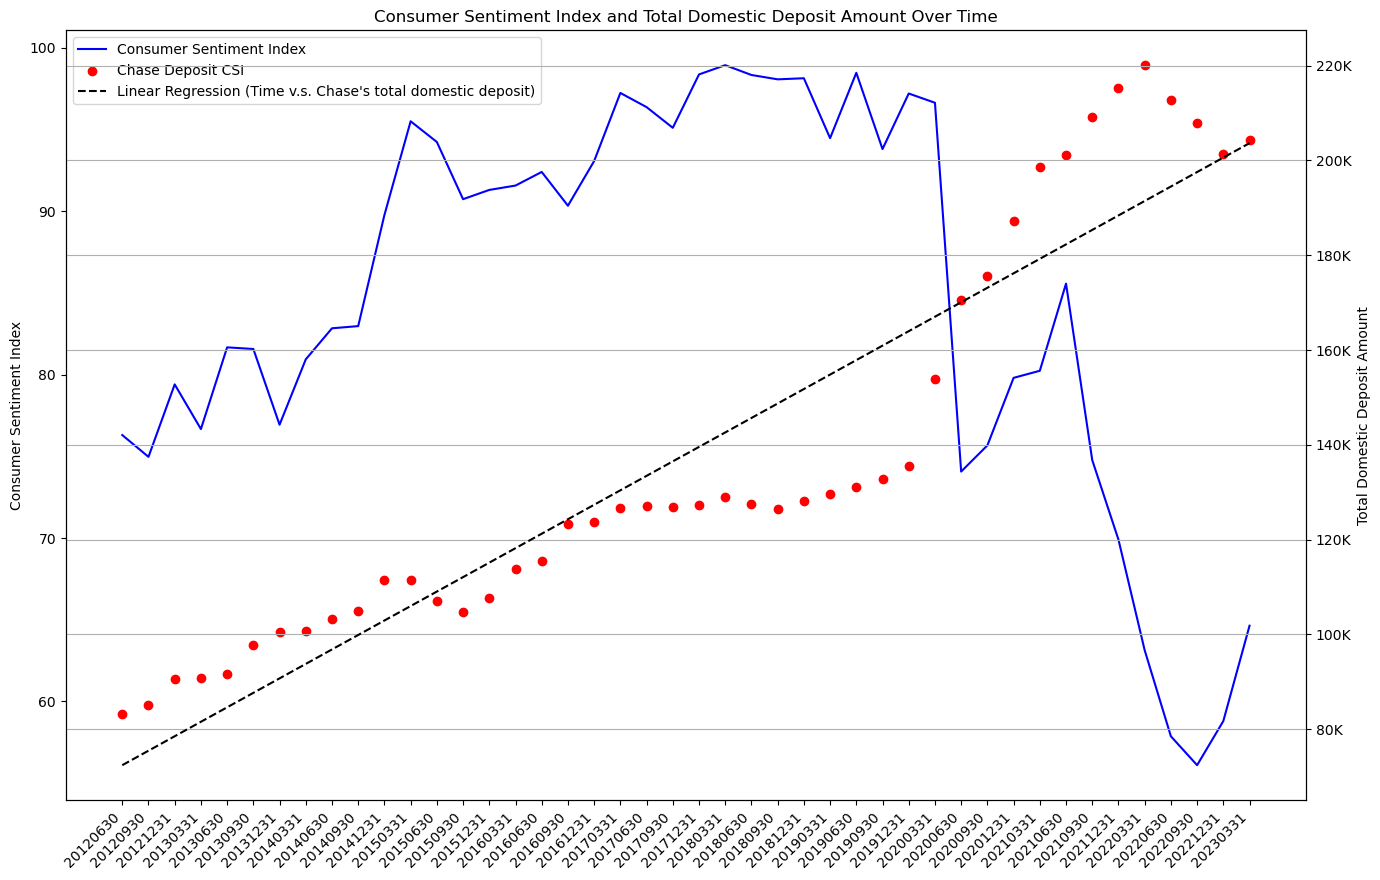

The slope of JPMorgan's linear regression (time v.s. total domestic deposit) is 30532052.43.


<Figure size 640x480 with 0 Axes>

In [204]:
#Graph: CSI and Chase's Total Domestic Deposit Amount Over Time

# Data for the CSI over time
# NOTE: Using reporting date from FDIC API for x_axis to ensure the consistency. The date shown in CSI dataframe 
# represent the same quarter of each year just in a different way.
x_axis = np.arange(len(new_bank_asset["Reporting Date"].unique()))
tick_locations = [value for value in x_axis]

# Create a figure and two subplots
fig, ax1 = plt.subplots(figsize=(16, 10))
ax2 = ax1.twinx()

# Plot the CSI over time
ax1.plot(x_axis, CSI, color="blue", label="Consumer Sentiment Index")
ax1.set_ylabel("Consumer Sentiment Index")
ax1.set_title("Consumer Sentiment Index and Total Domestic Deposit Amount Over Time")

# Data for the Total Domestic Deposit Amount Over Time & set up linear regression model
chase_dep_csi = new_bank_liabilites.loc[new_bank_liabilites["Bank Name"] == "JPMORGAN CHASE BANK NA", "Total Domestic Deposit"]
p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(x_axis,chase_dep_csi)
p_fit = p_slope * x_axis + p_int

# Plot the Total Domestic Deposit Amount Over Time
ax2.scatter(x_axis, chase_dep_csi, color="red", label="Chase Deposit CSI")
ax2.plot(x_axis, p_fit, "--", color="black", label="Linear Regression (Time v.s. Chase's total domestic deposit)")

# Combine legends
handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
handles += handles2
labels += labels2

# Add a combined legend
ax1.legend(handles, labels, loc='upper left')

# Set y-axis formatter for ax2 to show values in dollar amounts
formatter = ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-7))
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel("Total Domestic Deposit Amount")

# Set x-axis tick locations and labels
ax1.set_xticks(tick_locations)
ax1.set_xticklabels(new_bank_asset["Reporting Date"].unique(), rotation=45, ha='right')

# Display the figure
plt.grid()
plt.show()
print(f"The slope of JPMorgan's linear regression (time v.s. total domestic deposit) is {round(p_slope,2)}.")

#Save the image into output folder
plt.savefig("Outputs/CSI_Deposit_Correlation.png",bbox_inches = "tight")

In [205]:
# Calculate and print the slope of linear regression of each bank's Total Domestic Deposit over time
# Calculate and print the correlation coefficient between CSI and each bank's Total Domestic Deposit

bank_names = new_bank_liabilites["Bank Name"].unique()
bank_dep_csi = [new_bank_liabilites.loc[new_bank_liabilites["Bank Name"] == name, "Total Domestic Deposit"] for name in bank_names]

for name, dep_csi in zip(bank_names, bank_dep_csi):
    correlation_coefficient = round(st.pearsonr(CSI, dep_csi)[0], 2)
    p_slope, p_int, p_r, p_p, p_std_err = stats.linregress(x_axis,dep_csi)
    print(f"Bank:{name} | Slope of linear regression: {round(p_slope,2)}| Pearson correlation: {correlation_coefficient}")

Bank:CITIBANK NATIONAL ASSN | Slope of linear regression: 8497089.71| Pearson correlation: -0.62
Bank:GOLDMAN SACHS BANK USA | Slope of linear regression: 6724402.4| Pearson correlation: -0.63
Bank:BANK OF AMERICA NA | Slope of linear regression: 24556539.86| Pearson correlation: -0.53
Bank:JPMORGAN CHASE BANK NA | Slope of linear regression: 30532052.43| Pearson correlation: -0.55
Bank:FIRST REPUBLIC BANK | Slope of linear regression: 3273814.93| Pearson correlation: -0.52
Bank:WELLS FARGO BANK NA | Slope of linear regression: 14476302.18| Pearson correlation: -0.19
